In [13]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, GlobalAveragePooling2D, Dense, Add
import keras.backend as K

# Inverted residual block
def InvertedResidualBlock(x_input, expansion, filters, stride, block_id):
    in_channels = K.int_shape(x_input)[-1]
    prefix = f'block_{block_id}_'

    # Expansion phase
    if expansion != 1:
        x = Conv2D(expansion * in_channels, (1, 1), padding='same', use_bias=False, name=prefix + 'expand')(x_input)
        x = BatchNormalization(name=prefix + 'expand_BN')(x)
        x = ReLU(6., name=prefix + 'expand_relu')(x)
    else:
        x = x_input

    # Depthwise convolution phase
    x = DepthwiseConv2D((3, 3), strides=stride, padding='same', use_bias=False, name=prefix + 'depthwise')(x)
    x = BatchNormalization(name=prefix + 'depthwise_BN')(x)
    x = ReLU(6., name=prefix + 'depthwise_relu')(x)

    # Projection phase
    x = Conv2D(filters, (1, 1), padding='same', use_bias=False, name=prefix + 'project')(x)
    x = BatchNormalization(name=prefix + 'project_BN')(x)

    # Residual connection
    if in_channels == filters and stride == 1:
        x = Add(name=prefix + 'add')([x_input, x])

    return x

# MobileNetV2 architecture
def MobileNetV2(input_shape=(256, 256, 3), num_classes=6):
    inputs = Input(shape=input_shape)

    # Initial convolution layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', use_bias=False, name='Conv1')(inputs)
    x = BatchNormalization(name='bn_Conv1')(x)
    x = ReLU(6., name='Conv1_relu')(x)

    # Inverted residual blocks configuration: (expansion, filters, stride, num_blocks)
    block_configs = [
        (1, 16, 1, 1),
        (6, 24, 2, 2),
        (6, 32, 2, 3),
        (6, 64, 2, 4),
        (6, 96, 1, 3),
        (6, 160, 2, 3),
        (6, 320, 1, 1)
    ]

    block_id = 0
    for expansion, filters, stride, num_blocks in block_configs:
        for i in range(num_blocks):
            x = InvertedResidualBlock(x, expansion, filters, stride if i == 0 else 1, block_id)
            block_id += 1

    # Final layers
    x = Conv2D(1280, (1, 1), padding='same', use_bias=False, name='Conv_1')(x)
    x = BatchNormalization(name='Conv_1_bn')(x)
    x = ReLU(6., name='out_relu')(x)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax', name='Logits')(x)

    model = Model(inputs, outputs, name='mobilenetv2')

    return model

# Create MobileNetV2 model
model = MobileNetV2(input_shape=(256, 256, 3), num_classes=6)

# Print model summary
model.summary()







__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
bloc

In [14]:
import tensorflow as tf
import time
from keras import optimizers
opt = optimizers.SGD(lr=1e-2, momentum=0.9,decay=0.0008)
#opt = Adam(lr=INIT_LR,decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  #CrossEntropyLoss  'categorical_crossentropy'
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
1123/1123 [==============================] - 261s 233ms/step - loss: 1.4708 - acc: 0.4547 - val_loss: 1.3952 - val_acc: 0.4705: 1.7100 - - ETA: 2:03 - loss: 1.7023 - acc: 0.3 - ETA: 2:02 - loss: 1.7005 - ETA: 1:58 - loss: 1.6880 - ETA: 1:55 - loss: 1.6802 -  - ETA: 1:52 - ETA: 1:35 - loss: 1.6337 - acc: 0. - ETA: 1:34 - loss: 1.6330 - acc: - ETA: 1:32 - loss: 1.6 - ETA: 1:28 - loss: 1.6199 - ETA: 1:25 - loss: 1.6135 - acc: 0.40 -  - ETA: 1:16 - loss: 1.5965 - acc: 0.407 - ETA: 1:15 - loss: 1.5959 - acc: 0 - - - ETA: 7s - loss: 1.4794 - acc: 0. - ETA: 
Epoch 2/60
1123/1123 [==============================] - 172s 153ms/step - loss: 1.0105 - acc: 0.6206 - val_loss: 0.8271 - val_acc: 0.6860
Epoch 3/60
1123/1123 [==============================] - 166s 147ms/step - loss: 0.8095 - acc: 0.7041 - val_loss: 0.5843 - val_acc: 0.7951
Epoch 4/60
1123/1123 [==============================] - 163s 

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

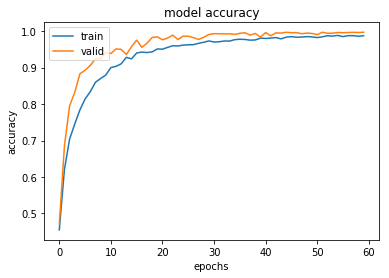

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

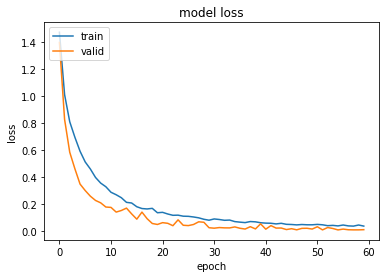

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[509   0   0   0   0   0]
 [  0 696   5   0   2   0]
 [  0   0 610   0   0   0]
 [  0   0   0 387   0   0]
 [  0   1   0   1 292   0]
 [  0   0   0   0   0 494]]

============TEST METRICS=============
Accuracy: 99.69969969969969%
Precision: 99.70169315830766%
Recall: 99.69969969969969%
F1-score: 99.70069641903916

TRAIN METRIC ----------------------
Train acc: 98.75


In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       1.00      1.00      1.00       509
                   Bipolaris maydis       1.00      0.99      0.99       703
Curvularia lunata(wakker) boed spot       0.99      1.00      1.00       610
               Northern leaf blight       1.00      1.00      1.00       387
                           Own spot       0.99      0.99      0.99       294
                      Sheath blight       1.00      1.00      1.00       494

                        avg / total       1.00      1.00      1.00      2997



In [21]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 12s 4ms/step
Test Accuracy: 99.69969969969969


In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 12s 4ms/step
0.012286297900525777
0.996996996996997


In [23]:
print(history.history['val_acc'])

[0.4704704704804145, 0.6860193527257955, 0.7951284618349047, 0.8321654988321655, 0.8832165498832165, 0.8925592258925592, 0.9059059059059059, 0.9235902569235902, 0.9245912579245913, 0.9419419419419419, 0.9386052719386053, 0.9512846179711727, 0.94994994994995, 0.935935935955824, 0.9572906239572906, 0.9753086419753086, 0.9556222889556223, 0.9669669669669669, 0.9826493159826493, 0.9843176509843177, 0.9763096429763096, 0.980980980980981, 0.988988988988989, 0.9769769769769769, 0.9863196529863196, 0.985985985985986, 0.9823156489823156, 0.9773106439773106, 0.982982982982983, 0.990990990990991, 0.992992992992993, 0.992992992992993, 0.9923256589923256, 0.9926593259926594, 0.990990990990991, 0.993993993993994, 0.9956623289956623, 0.988988988988989, 0.9936603269936604, 0.9836503169836504, 0.995995995995996, 0.9873206539873206, 0.9953286619953287, 0.9946613279946613, 0.996996996996997, 0.9956623289956623, 0.995995995995996, 0.992992992992993, 0.9946613279946613, 0.9936603269936604, 0.99032365699032

In [24]:
print(history.history['val_loss'])

[1.3951514417981163, 0.8270814198233662, 0.5843322632519213, 0.4619910321336688, 0.3491333259725157, 0.3012927030702611, 0.2594948783516884, 0.22820747439607525, 0.21053113013351804, 0.1795648826838713, 0.17687155651304626, 0.14219589864236634, 0.15391195040851244, 0.17159866087064382, 0.1289273943783281, 0.08989706737199699, 0.1421016512153074, 0.09339004614599258, 0.05796674684655421, 0.0508338231705241, 0.06416351050758812, 0.05932171999033718, 0.0416411650837093, 0.08490727585002353, 0.044837358756417214, 0.042499276001614975, 0.05063122846545079, 0.07040621520720503, 0.06706553394733367, 0.026702042542844136, 0.023248383001113367, 0.027861082975267955, 0.025699367456410507, 0.025363325933262508, 0.03263401319486069, 0.02264715440365901, 0.01696246709012851, 0.03440046891677922, 0.017967430578627007, 0.05535521209914291, 0.015958085376841652, 0.04230657696979842, 0.024068377256533425, 0.024500333566439946, 0.013106992081536631, 0.0195112872087741, 0.011278142250652585, 0.0219512278

In [25]:
print(history.history['acc'])

[0.45469723953695457, 0.6205744822846572, 0.7040748163125372, 0.7453796481918954, 0.7841238031486073, 0.8139612558516593, 0.8337786684612791, 0.859608105099087, 0.8700734803071932, 0.8794255176887988, 0.9000222667557337, 0.9033622801025151, 0.9103763081718994, 0.928189712758851, 0.92395902916945, 0.9401024270763749, 0.9425517701938088, 0.9413270986417279, 0.9431084391004231, 0.9511244711645513, 0.9505678022712091, 0.9554664885326208, 0.9599198396793587, 0.9593631707860165, 0.9617011801380538, 0.9625918503674015, 0.9629258517034068, 0.9665998663994656, 0.9694945446448452, 0.9731685593409041, 0.9700512135381875, 0.9709418837675351, 0.9730572255622356, 0.9727232242262303, 0.9766199064796259, 0.9778445780449788, 0.9771765753596962, 0.9752839011356046, 0.9758405700289468, 0.980850590069027, 0.9799599198396793, 0.9809619238476954, 0.9824092629703852, 0.9788465820529949, 0.9835226007437977, 0.984858606087819, 0.9832999331997327, 0.983856602093075, 0.985081273658428, 0.9843019372077488, 0.9824

In [26]:
print(history.history['loss'])

[1.470803971069791, 1.0105626397689236, 0.8095317047493306, 0.6948465750772739, 0.5916602654808535, 0.512513290874227, 0.46036395298342375, 0.39799123584553914, 0.35635967083993664, 0.3294423434562339, 0.28856968263794996, 0.2703270056183143, 0.24856604240582544, 0.21414472965763742, 0.2093437158352706, 0.18169625400165537, 0.1684049664196303, 0.16536346684761413, 0.16982359999799704, 0.13735614658345388, 0.14036403362595906, 0.1281244747807896, 0.1184912069918506, 0.11949630352734616, 0.11187738264862973, 0.11088128647256035, 0.10609224301208564, 0.0997771405118456, 0.08910984536142452, 0.08221337991273389, 0.09155538530852414, 0.08743259593719678, 0.08153962484733858, 0.08327545512710667, 0.0719420737137948, 0.06788912397369484, 0.06449030532589876, 0.07237908395920067, 0.0701840115805128, 0.06350367520912763, 0.060627964151053926, 0.059657505704926755, 0.054849472149742146, 0.05935023790926315, 0.05183138158417072, 0.05053464385715175, 0.04767419651402379, 0.05038450887676543, 0.048

In [27]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 12s 4ms/step


array([0, 5, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[509   0   0   0   0   0]
 [  0 696   5   0   2   0]
 [  0   0 610   0   0   0]
 [  0   0   0 387   0   0]
 [  0   1   0   1 292   0]
 [  0   0   0   0   0 494]]


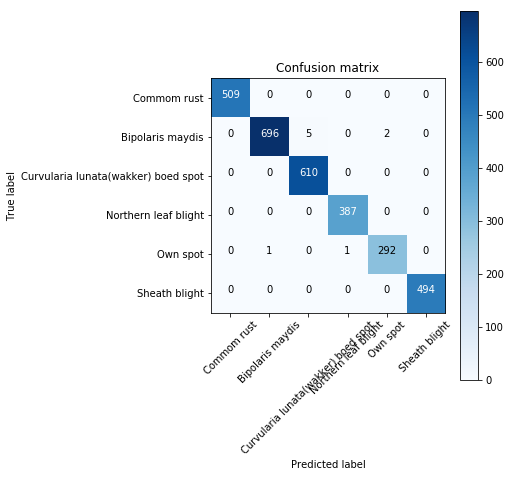

In [29]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')